In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer

import pymorphy2
from nltk.corpus import stopwords
import logging
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
data_positive = pd.read_csv("Russian_Twitter_Sentiment/positive.csv", sep=';', header=None)
data_negative = pd.read_csv("Russian_Twitter_Sentiment/negative.csv", sep=';', header=None)
print(data_positive.shape)
print(data_negative.shape)

(114911, 12)
(111923, 12)


In [91]:
data_positive.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1


In [92]:
data_positive = data_positive.drop(data_positive[[0,1,2,5,6,7,8,9,10,11]],axis=1) # удаляемые индексы, axis=1 - у столбцов
data_negative = data_negative.drop(data_negative[[0,1,2,5,6,7,8,9,10,11]],axis=1)
data_positive.columns=['comment', 'label']
data_negative.columns=['comment', 'label']
data_positive.head()

,comment,label
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1


In [93]:
fault = 11000
max_comments = 100000
data_positive = data_positive[:int((max_comments + fault) / 2)] # перезаписываем df
data_negative = data_negative[:int((max_comments + fault) / 2)] # перезаписываем df
print(data_positive.shape)
print(data_negative.shape)

(55500, 2)
(55500, 2)


In [94]:
def clean_data(comment):
    clean_pattern = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-\n\“\”]+"
    comment = re.sub(clean_pattern, ' ', comment)
    clean_pattern = "[^А-Яа-я\sA-Za-z]" # для удаления emoji
    comment = re.sub(clean_pattern, ' ', comment)
    return comment

data_positive['comment'] = data_positive['comment'].apply(clean_data)
data_negative['comment'] = data_negative['comment'].apply(clean_data)

data_positive.head()

,comment,label
0,хоть я и школота но поверь у нас то же сам...,1
1,Да все таки он немного похож на него Но мой ...,1
2,Ну ты идиотка я испугалась за тебя,1
3,Кто то в углу сидит и погибает от голода ...,1
4,Вот что значит страшилка Но блин посмотрев ...,1


In [3]:
stopwords = stopwords.words("russian")
pymorph = pymorphy2.MorphAnalyzer()

def to_normal_form(comment):
    comment = comment.split() # Разделяем комментарий на слова
    tokens = []
    for token in comment:
        if token and token not in stopwords:
            token = token.strip() # удаляем лишние пробелы в токене
            token = pymorph.normal_forms(token)[0]
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [96]:
data_positive['comment'] = data_positive['comment'].apply(to_normal_form)
data_negative['comment'] = data_negative['comment'].apply(to_normal_form)
data_positive = data_positive.dropna() 
data_negative = data_negative.dropna() # удалить None строки

In [97]:
data_positive.head()

,comment,label
0,"[школотый, поверь, самый, общество, профилиров...",1
1,"[да, таки, немного, похожий, но, мальчик, равно]",1
2,"[ну, идиотка, испугаться]",1
3,"[кто, угол, сидеть, погибать, голод, ещ, порци...",1
4,"[вот, значит, страшилка, но, блин, посмотреть,...",1


In [98]:
data_negative.head()

,comment,label
0,"[работа, полный, пиддес, каждый, закрытие, мес...",-1
1,"[коллега, сидеть, рубиться, долбать, винд, мочь]",-1
2,"[говорить, обещаной, год, ждать]",-1
3,"[желать, хороший, пол, тот, удачный, посадка, ...",-1
4,"[обновить, какой, леший, работать, простоплеер]",-1


In [99]:
print(data_positive.shape)
print(data_negative.shape)

(52902, 2)
(52139, 2)


In [100]:
data_positive = data_positive[:int(max_comments / 2)] # перезаписываем df
data_negative = data_negative[:int(max_comments / 2)] # перезаписываем df
print(data_positive.shape)
print(data_negative.shape)

(50000, 2)
(50000, 2)


In [101]:
all_data = pd.concat([data_positive, data_negative]) # конкатенация df-ов
print(all_data.shape)

all_data = shuffle(all_data) # перемешиваем df
all_data.reset_index(drop=True, inplace=True) # обновляем индексы
all_data.head()

(100000, 2)


,comment,label
0,"[примерно, грн, дорогой]",-1
1,"[а, вова, наоборот, возмущаться, почему, писать]",-1
2,"[баба, катя, попытка, казаться, грозный]",1
3,"[выходной, подряд, проходить, отлично]",1
4,"[мы, сегодня, уха, приятный, аппетит, единоедец]",1


<AxesSubplot:xlabel='label', ylabel='count'>

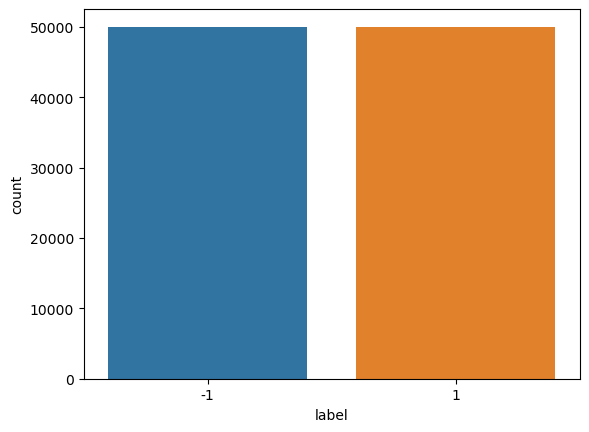

In [102]:
sns.countplot(x='label', data=all_data)

In [103]:
print(all_data['comment'][0])

['примерно', 'грн', 'дорогой']


In [104]:
# Записать csv для получения быстрого досутпа к данным

def csv_comment(comment):
    comment = ' '.join(comment)
    return comment

data_to_write = all_data
data_to_write['comment'] = data_to_write['comment'].apply(csv_comment)
data_to_write.to_csv("Russian_Twitter_Sentiment/clear_data_frame100k(last).csv", index=False)

In [105]:
data_to_write.head()

,comment,label
0,примерно грн дорогой,-1
1,а вова наоборот возмущаться почему писать,-1
2,баба катя попытка казаться грозный,1
3,выходной подряд проходить отлично,1
4,мы сегодня уха приятный аппетит единоедец,1


In [ ]:
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП

In [106]:
def split_comments(comment):
    comment = comment.split()
    return comment

all_data = pd.read_csv("Russian_Twitter_Sentiment/clear_data_frame100k(last).csv")
all_data['comment'] = all_data['comment'].apply(split_comments)

In [107]:
all_data.head()

,comment,label
0,"[примерно, грн, дорогой]",-1
1,"[а, вова, наоборот, возмущаться, почему, писать]",-1
2,"[баба, катя, попытка, казаться, грозный]",1
3,"[выходной, подряд, проходить, отлично]",1
4,"[мы, сегодня, уха, приятный, аппетит, единоедец]",1


In [108]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

In [109]:
def train_w2v_model(data):
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
    model = Word2Vec(
        min_count = 10, # Слова которые всречаются в словаре менее 10 раз игнорируем
        window = 2, # Сколько слов контекста, которые должен учитывать алгоритм
        vector_size = 300, # Размерность вектора слова(Большое значение = много обучающих данных)
        workers = cpu_count(), # Многопоточность обучения
        sample=1e-3, # Понижающая дискретизация для высокочастотных слов (среднее рекомендованное значение)
        sg = 1 # если 1, то используется реализация Skip-gram(более точный); если 0, то CBOW(более быстрый).
        )
    
    model.build_vocab(data)
    
    print('Обучение модели Word2Vec ...')
    model.train(data, total_examples=model.corpus_count, epochs=30, report_delay=1)
    
    return model

In [110]:
data = all_data['comment']
print(data[9506])

['ахахи', 'беситься', 'дом', 'сидеть', 'вк']


In [111]:
model = train_w2v_model(data)

2023-05-03 14:32:51,950 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2023-05-03T14:32:51.950935', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}
2023-05-03 14:32:51,951 : INFO : collecting all words and their counts
2023-05-03 14:32:51,952 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-05-03 14:32:51,974 : INFO : PROGRESS: at sentence #10000, processed 74168 words, keeping 15540 word types
2023-05-03 14:32:51,997 : INFO : PROGRESS: at sentence #20000, processed 148985 words, keeping 23648 word types
2023-05-03 14:32:52,025 : INFO : PROGRESS: at sentence #30000, processed 223463 words, keeping 29925 word types
2023-05-03 14:32:52,051 : INFO : PROGRESS: at sentence #40000, processed 297422 words, keeping 35342 word types
2023-05-03 14:32:52,077 : INFO : PROGRESS: at sentence #50000

Обучение модели Word2Vec ...


2023-05-03 14:32:53,299 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-05-03 14:32:53,305 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-05-03 14:32:53,311 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-05-03 14:32:53,318 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-05-03 14:32:53,320 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-05-03 14:32:53,321 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-05-03 14:32:53,324 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-05-03 14:32:53,338 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-05-03 14:32:53,338 : INFO : EPOCH - 1 : training on 742440 raw words (595897 effective words) took 0.9s, 654296 effective words/s
2023-05-03 14:32:54,121 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-05-03 14:32:54,123 : INFO : worker thread

2023-05-03 14:33:00,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-05-03 14:33:00,426 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-05-03 14:33:00,433 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-05-03 14:33:00,434 : INFO : EPOCH - 10 : training on 742440 raw words (595922 effective words) took 0.7s, 797456 effective words/s
2023-05-03 14:33:01,188 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-05-03 14:33:01,200 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-05-03 14:33:01,202 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-05-03 14:33:01,204 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-05-03 14:33:01,209 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-05-03 14:33:01,217 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-05-03 14:33:01,225 : INFO : worker threa

2023-05-03 14:33:08,282 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-05-03 14:33:08,288 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-05-03 14:33:08,290 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-05-03 14:33:08,291 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-05-03 14:33:08,300 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-05-03 14:33:08,308 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-05-03 14:33:08,322 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-05-03 14:33:08,323 : INFO : EPOCH - 20 : training on 742440 raw words (595901 effective words) took 0.8s, 749999 effective words/s
2023-05-03 14:33:09,033 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-05-03 14:33:09,035 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-05-03 14:33:09,045 : INFO : worker threa

2023-05-03 14:33:15,278 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-05-03 14:33:15,281 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-05-03 14:33:15,281 : INFO : EPOCH - 29 : training on 742440 raw words (595686 effective words) took 0.7s, 840320 effective words/s
2023-05-03 14:33:16,034 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-05-03 14:33:16,042 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-05-03 14:33:16,045 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-05-03 14:33:16,053 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-05-03 14:33:16,058 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-05-03 14:33:16,060 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-05-03 14:33:16,064 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-05-03 14:33:16,083 : INFO : worker threa

In [112]:
# СОхраняем векторы слов 

from gensim.models import KeyedVectors
word_vectors = model.wv
word_vectors.save(r"Russian_Twitter_Sentiment/word2vec.wordvectors")

2023-05-03 14:33:36,962 : INFO : KeyedVectors lifecycle event {'fname_or_handle': 'Russian_Twitter_Sentiment/word2vec.wordvectors', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-05-03T14:33:36.962902', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'saving'}
2023-05-03 14:33:36,980 : INFO : saved Russian_Twitter_Sentiment/word2vec.wordvectors


In [7]:
# Загружаем векторы слов
from gensim.models import KeyedVectors
wv = KeyedVectors.load(r"Russian_Twitter_Sentiment/word2vec.wordvectors", mmap='r')

In [8]:
wv.most_similar(['умница'])

[('очинь', 0.41544538736343384),
 ('уста', 0.4089416563510895),
 ('плюшевый', 0.40261945128440857),
 ('полюбома', 0.3857073187828064),
 ('угга', 0.385501503944397),
 ('бомбить', 0.3700158894062042),
 ('принцесса', 0.3641073703765869),
 ('пупсик', 0.36311018466949463),
 ('сладко', 0.3554232120513916),
 ('оуу', 0.35276418924331665)]

In [9]:
wv.doesnt_match("водитель автобус женщина".split())

'женщина'

In [13]:
# data = pd.read_csv("Russian_Twitter_Sentiment/clear_data_frame.csv")
# comments_data = data['comment']
# comments_data.head()
# print(comments_data[0])

# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(analyzer = "word", tokenizer=None,
#                               preprocessor=None, stop_words = None,
#                               max_features=1000)

# # Изучаем словарный запас словаря и возвращаем документ-матрицу признаков
# train_data_features = vectorizer.fit_transform(comments_data) 
# train_data_features = train_data_features.toarray()

# train_data_features.shape

# CountVectorizedData=pd.DataFrame(train_data_features, columns=vectorizer.get_feature_names_out())
# CountVectorizedData['label']=data['label']

# print(CountVectorizedData.shape)
# CountVectorizedData.head()

In [124]:
all_data.head()

,comment,label
0,"[примерно, грн, дорогой]",-1
1,"[а, вова, наоборот, возмущаться, почему, писать]",-1
2,"[баба, катя, попытка, казаться, грозный]",1
3,"[выходной, подряд, проходить, отлично]",1
4,"[мы, сегодня, уха, приятный, аппетит, единоедец]",1


In [10]:
# Обучение BOW
data = pd.read_csv("Russian_Twitter_Sentiment/clear_data_frame100k(last).csv")
comments_data = data['comment']
comments_data.head()
print(comments_data[0])

примерно грн дорогой


In [11]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer=None,
                              preprocessor=None, stop_words = None,
                              max_features=10000)

# Изучаем словарный запас словаря и возвращаем документ-матрицу признаков
train_data_features = vectorizer.fit_transform(comments_data) 
train_data_features = train_data_features.toarray()

train_data_features.shape

(100000, 10000)

In [127]:
import pickle
filename = "BOW.pkl"
with open(filename, 'wb') as file:
    pickle.dump(vectorizer, file)

with open(filename, 'rb') as file:
    bow_model = pickle.load(file)
    
# with open(filename, 'wb') as file:
#     pickle.dump(train_data_features, file)


x = bow_model.transform(['Привет', 'как', 'дела'])
print(x)

  (0, 6573)	1
  (1, 2954)	1


In [128]:
print(bow_model.get_feature_names_out())

['аа' 'ааа' 'аааа' ... 'ёлка' 'ёлочка' 'ёлочный']


In [12]:
CountVectorizedData=pd.DataFrame(train_data_features, columns=vectorizer.get_feature_names_out())
CountVectorizedData['label']=data['label']

print(CountVectorizedData.shape)
CountVectorizedData.head()
# Конец обучения

(100000, 10001)


,аа,ааа,аааа,ааааа,аааааа,ааааааа,аааааааа,ааааааааа,аааааааааа,ааааааааааа,...,ясно,ясный,ящик,яяять,ёбаный,ёжик,ёлка,ёлочка,ёлочный,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
WordsVocab=CountVectorizedData.columns[:-1]

In [131]:
WordsVocab[0]

'аа'

In [132]:
filename = "WordsVocab.pkl"
with open(filename, 'wb') as file:
    pickle.dump(WordsVocab, file)

with open(filename, 'rb') as file:
    test = pickle.load(file)
    

In [5]:
def Text2Vec(text_data):
    # Преобразуем текст в числовые данные
    x = vectorizer.transform(text_data)
    CountVecData=pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Создание пустого фрейма данных для хранения предложений
    W2Vec_Data=pd.DataFrame()
    
    # Перебираем каждую строку в поисках данных
    for i in range(CountVecData.shape[0]):
        if i % 1000 == 0:
            print('[{}/100] => {}'.format(i / 1000, i))
        
        # Инициализируем предложение нулями
        Sentence = np.zeros(300)
        
        # Перебираем каждое слово в предложении и, если оно присутствует в модели Word2Vec, сохраняем его вектор
        for word in WordsVocab[CountVecData.iloc[i,:] >= 1]:
            # print(word)
            if word in wv.key_to_index.keys():    
                Sentence=Sentence+wv[word]
        # Добавляем предложение в датафрэйм
        W2Vec_Data = pd.concat([W2Vec_Data, pd.DataFrame([Sentence])])
        # W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
        # all_data = pd.concat([data_positive, data_negative])
    return(W2Vec_Data)

In [135]:
x_data = data['comment']
W2Vec_Data = Text2Vec(x_data)

[0.0/100] => 0
[1.0/100] => 1000
[2.0/100] => 2000
[3.0/100] => 3000
[4.0/100] => 4000
[5.0/100] => 5000
[6.0/100] => 6000
[7.0/100] => 7000
[8.0/100] => 8000
[9.0/100] => 9000
[10.0/100] => 10000
[11.0/100] => 11000
[12.0/100] => 12000
[13.0/100] => 13000
[14.0/100] => 14000
[15.0/100] => 15000
[16.0/100] => 16000
[17.0/100] => 17000
[18.0/100] => 18000
[19.0/100] => 19000
[20.0/100] => 20000
[21.0/100] => 21000
[22.0/100] => 22000
[23.0/100] => 23000
[24.0/100] => 24000
[25.0/100] => 25000
[26.0/100] => 26000
[27.0/100] => 27000
[28.0/100] => 28000
[29.0/100] => 29000
[30.0/100] => 30000
[31.0/100] => 31000
[32.0/100] => 32000
[33.0/100] => 33000
[34.0/100] => 34000
[35.0/100] => 35000
[36.0/100] => 36000
[37.0/100] => 37000
[38.0/100] => 38000
[39.0/100] => 39000
[40.0/100] => 40000
[41.0/100] => 41000
[42.0/100] => 42000
[43.0/100] => 43000
[44.0/100] => 44000
[45.0/100] => 45000
[46.0/100] => 46000
[47.0/100] => 47000
[48.0/100] => 48000
[49.0/100] => 49000
[50.0/100] => 50000
[51

In [136]:
print(W2Vec_Data.shape)  # Сравниваем
print(CountVectorizedData.shape)

(100000, 300)
(100000, 10001)


In [137]:
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['label']=CountVectorizedData['label']

ML_Data = W2Vec_Data

In [138]:
ML_Data.info()
ML_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 301 entries, 0 to label
dtypes: float64(300), int64(1)
memory usage: 229.6 MB


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,1.053193,0.841412,0.697245,0.246739,0.210200,0.510720,0.722905,1.105309,0.160286,0.267027,...,0.591643,0.510798,-0.064156,0.066372,0.296858,-0.287951,-0.003392,-0.076076,0.463529,-1
1,0.040325,1.540033,0.488216,-0.054976,0.536321,-1.414876,0.066703,1.389062,1.185513,0.652167,...,-0.290207,0.946416,0.614703,0.252602,0.081963,0.601545,-0.399664,0.409464,-0.318532,-1
2,0.302729,0.578587,0.680163,0.319750,0.556468,-0.803243,-0.159995,1.043968,-0.761601,0.097280,...,1.236191,0.821674,-0.205555,0.365966,0.423919,-0.671288,-1.393452,0.733572,0.967656,1
3,0.743636,1.089196,-0.309709,0.282230,0.472903,0.175651,0.469063,1.291440,0.866584,-0.006299,...,-0.181743,0.306240,-0.481268,-0.390834,2.181167,0.403962,-1.010694,1.413713,-1.065544,1
4,-0.384823,0.912526,1.252780,0.883729,0.082583,-0.668146,0.596402,1.568632,-0.082458,-0.154475,...,0.225416,-0.244113,0.259240,-0.050000,1.003187,0.609898,-0.999640,0.622389,1.010660,1


In [139]:
ML_Data.to_pickle(r"Russian_Twitter_Sentiment/MachineLearning_Data300_100k(last).pkl") # Сохраняем

In [140]:
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП
# БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП БЫСТРЫЙ ДОСТУП

In [2]:
ML_Data = pd.read_pickle(r"Russian_Twitter_Sentiment/MachineLearning_Data300_100k(last).pkl") # Загружаем

In [3]:
ML_Data.info() # Сверяем
ML_Data.head()
print(ML_Data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 301 entries, 0 to label
dtypes: float64(300), int64(1)
memory usage: 229.6 MB
(100000, 301)


In [4]:
from sklearn.model_selection import train_test_split
values_label = ML_Data.columns[-1]
values_data = ML_Data.columns[:-1]

x = ML_Data[values_data].values
y = ML_Data[values_label].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=104)
print('X_train =', x_train.shape)
print('X_test =', x_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (80000, 300)
X_test = (20000, 300)
y_train = (80000,)
y_test = (20000,)


In [5]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [145]:
RandForest = RandomForestClassifier(n_estimators=100)
RandForest = RandForest.fit(x_train, y_train)

In [146]:
RandForest_predict = RandForest.predict(x_test)
print(accuracy_score(y_test, RandForest_predict))
print("\n\n")
print(classification_report(y_test, RandForest_predict))

0.6959



              precision    recall  f1-score   support

          -1       0.69      0.70      0.69      9894
           1       0.70      0.69      0.70     10106

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000



In [147]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(max_iter=500)
log_regr.fit(x_train, y_train)

log_predict = log_regr.predict(x_test)
print(accuracy_score(y_test, log_predict))
print(classification_report(y_test, log_predict))

0.6902
              precision    recall  f1-score   support

          -1       0.69      0.68      0.69      9894
           1       0.69      0.70      0.69     10106

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



In [2]:
from nltk.corpus import stopwords
stopwords = stopwords.words("russian")
pymorph = pymorphy2.MorphAnalyzer()

def to_normal_form(comment):
    comment = comment.split() # Разделяем комментарий на слова
    tokens = []
    for token in comment:
        if token and token not in stopwords:
            token = token.strip() # удаляем лишние пробелы в токене
            token = pymorph.normal_forms(token)[0]
            tokens.append(token)
    print(tokens)
    return tokens

In [161]:
import pickle
filename = "Random_Forest_Model_6959.pkl"
with open(filename, 'wb') as file:
    pickle.dump(RandForest, file)
with open(filename, 'rb') as file:
    pred_model = pickle.load(file)

pred_model_predict = pred_model.predict(x_test)
print(accuracy_score(y_test, pred_model_predict))

0.6959


In [18]:
import pickle
filename = "Random_Forest_Model_6959.pkl"
with open(filename, 'rb') as file:
    pred_model = pickle.load(file)

message = "Вы какие то левые инструкции даете бесполезные. Потом люди думают, что это не работает" # -1
message = "Крутая идея, мне нравится" # 1
message = "слушай меня, придурок" # 1
message = "Дурацкое обновление🙁 хотела бы увидеть эти фото, как раньше было, в коллаже" # -1
message = "ну нафиг до полумиллиона дошёл за час с небольшим и надоело)" # -1
message = "менеджмент для слабаков" # 1
message = "Тревожно как-то..." # 1
message = "Господи, спасибо, что я не живу уже в Кемерово. С этих гаражей в снег в детстве прыгали." # 1
message = "Итить и сказать нечего.!!! А что делать обычным теперь?! Скоро обычных людей надо будет защищать...🤔👎" # 1
message = "Задолбали со своими ущемлёнками" # -1
message = "Почему таким бог даёт детей а нормальным семьям нет" # -1
message = "Хорошо, что есть неравнодушные люди!" # 1
message = "Не админ, а умопомрачение. Где такого взяли?" # -1
message = "береги вас бог" # -1
message = "Молодцы , порадовали мальчишку" # 1
message = "Просто до слез хотелось-бы чтоб для деток с ограниченными возможностями здоровья сделали секции с играми" # -1
message = "Какие умнички" # 1
message = "Мне сказали, что сегодня будет хорошая погода" # 1



def to_normal_form(comment):
    comment = comment.split() # Разделяем комментарий на слова
    tokens = []
    for token in comment:
        if token and token not in stopwords:
            token = token.strip() # удаляем лишние пробелы в токене
            token = pymorph.normal_forms(token)[0]
            tokens.append(token)
    return tokens

def clean_comment(comment):
    clean_pattern = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-\n\“\”]+"
    comment = re.sub(clean_pattern, ' ', comment)
    clean_pattern = "[^А-Яа-я\sA-Za-z]"
    comment = re.sub(clean_pattern, ' ', comment)
    return comment

def to_pred_func(comment):  
    comment = clean_comment(comment)
    print('clean_comment: ', comment)
    comment = to_normal_form(comment)
    print('to_normal_form: ', comment)
    comment = ' '.join(map(str, comment))
    x = [comment]   
    ml_comment = Text2Vec(x)
    return ml_comment

pred_message = to_pred_func(message)
predict = pred_model.predict(pred_message)
print(predict[0])


clean_comment:  Мне сказали  что сегодня будет хорошая погода
to_normal_form:  ['я', 'сказать', 'сегодня', 'хороший', 'погода']
[0.0/100] => 0
1


In [181]:
wv.most_similar(['хороший'])

[('дерьмовый', 0.35898298025131226),
 ('пофигизм', 0.3579992949962616),
 ('ангела', 0.32462459802627563),
 ('лый', 0.323357492685318),
 ('охуенный', 0.3166358172893524),
 ('артист', 0.31482166051864624),
 ('талантливый', 0.31298303604125977),
 ('унывать', 0.31167155504226685),
 ('выздоровление', 0.3068118095397949),
 ('радостный', 0.30135664343833923)]

In [182]:

comments = pd.read_csv("matfak_volsu.csv")
# comments.head()
# data_positive['comment'] = data_positive['comment'].apply(to_normal_form)
#comments['comment'] = comments['comment'].apply(to_pred_func)
pos_arr = []
neg_arr = []
pos_count = 0
neg_count = 0
for com in comments['comment']:
    pred_com = to_pred_func(com)
    predict = pred_model.predict(pred_com)
    if predict == 1:
        pos_arr.append(com)
        pos_count += 1
    elif predict == -1:
        neg_arr.append(com)
        neg_count += 1


[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] => 0
[0.0/100] 

In [183]:
print(f"positive = {pos_count}")
print(f"negative = {neg_count}")
print(f"Pos_arr header: {pos_arr[:10]}")
print(f"Neg_arr header: {neg_arr[:10]}")

positive = 335
negative = 64
Pos_arr header: ['Крутые!', 'Апхпххахп И снова смешнявка, лайк!', 'О да, какие только мысли ни приходят во время пары!', 'про мечту до слес...', 'Писанко Александр Александрович РФБ-201', 'ВАУУУ, КАКИЕ ОБАЛДЕННЫЕ РАБОТЫ😍', 'Вау😍', '[id306385898|Anastasia,] умничка! Очень красиво', 'ой какая мышка красивая😍', 'Вот это коллаб 💛💜']
Neg_arr header: ['Дадададада это мыыыыыыы 💛💛💛💛🖐🖐🖐', 'Срочно открываем sleep комнату', 'Такие мысли посещают в основном на лекциях 🤡', 'Откуда вы знаете мои мысли?😳', 'Почему "Матфак Рулит", если мы не водители и никуда не едем?', 'Почему есть Юраткина, но её нет на парах', 'Голубев Иван Владиславович, РФБ-221', 'Казак Никита Алексеевич, РФБ-201', 'а, ой', 'а ничего, что 1 это обводка? 🤨']


In [90]:
import pickle
filename = "Random_Forest_Model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(RandForest, file)

with open(filename, 'rb') as file:
    pred_model = pickle.load(file)

# pickle_predict = pickle_model.predict(x_test)
# print(accuracy_score(y_test, pickle_predict))
predict = pred_model.predict(pred_message)
print(predict[0])

1


In [6]:
from sklearn.preprocessing import StandardScaler

StandSC = StandardScaler()

x_train_NB = StandSC.fit_transform(x_train)
x_test_NB = StandSC.transform(x_test)

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train_NB, y_train)

NaiveBayes_predict = NaiveBayes.predict(x_test_NB)
print(accuracy_score(y_test, NaiveBayes_predict))
print(classification_report(y_test, NaiveBayes_predict))

0.66515
              precision    recall  f1-score   support

          -1       0.66      0.67      0.66      9894
           1       0.67      0.66      0.67     10106

    accuracy                           0.67     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.67      0.67      0.67     20000



In [ ]:
# from sklearn.svm import SVC 
# svclassifier = SVC(kernel='linear') 
# svclassifier.fit(x_train, y_train)

# svc_pred = svclassifier.predict(x_test)
# print(accuracy_score(y_test, svc_pred))
# print(classification_report(y_test, svc_pred))

In [184]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Dropout, Flatten
from keras import regularizers

print(tf.config.list_physical_devices('GPU'))

x_train_3d = x_train[..., None]
y_train_3d = y_train[..., None]
x_test_2d = x_test[..., None]
y_test_2d = y_test[..., None]


def load_CNN_model(model_path):
    model = None
    
    if model_path is not None:
        try:
            model = keras.models.load_model(model_path)
            print('Загрузка модели...')
        except:
            print('Не удалось загрузить модель!')
    
    if model is None:
        model = False
        
    return model

def create_CNN_model(kernel, pool):
    cnn_model = Sequential()
    
    cnn_model.add(Dropout(0.2))
    
    cnn_model.add(Conv1D(filters=64, kernel_size=kernel, padding="same", activation="relu"))
    cnn_model.add(MaxPooling1D(pool_size=pool))
    cnn_model.add(Conv1D(filters=128, kernel_size=kernel, padding="same", activation="relu"))
    cnn_model.add(MaxPooling1D(pool_size=pool))
    cnn_model.add(Conv1D(filters=128, kernel_size=kernel+1, padding="same", activation="relu"))
    cnn_model.add(MaxPooling1D(pool_size=pool))
    cnn_model.add(Conv1D(filters=128, kernel_size=kernel+1, padding="same", activation="relu"))
    cnn_model.add(MaxPooling1D(pool_size=pool))
    cnn_model.add(Conv1D(filters=64, kernel_size=kernel, padding="same", activation="relu"))
    cnn_model.add(MaxPooling1D(pool_size=pool))
    cnn_model.add(Dropout(0.5))
    
    

    cnn_model.add(Dense(32, activation="relu"))
    cnn_model.add(Dense(1, activation="sigmoid"))

    cnn_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    
    return cnn_model

model_path = r"Russian_Twitter_Sentiment\CNN_model9"
CNN_model = load_CNN_model(model_path)

if CNN_model: 
    print("Модель успешно загружена")
else:
    print("Создание новой модели...")
    CNN_model = create_CNN_model(kernel=2, pool=2)
    print("Тренировка новой модели...")
    history = CNN_model.fit(x_train_3d, y_train_3d, epochs = 2, batch_size = 32, verbose = 1, validation_split=0.2)
    print("Сохранение модели...")
    CNN_model.save(model_path)
    
    print("Сохранение истории модели...")
    history_df = pd.DataFrame(history.history)
    with open(model_path + '_history.csv', mode='wb') as file:
        history_df.to_csv(file)
    
    print("Все операции выполнены")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Не удалось загрузить модель!
Создание новой модели...
Тренировка новой модели...
Epoch 1/2
 463/2000 [=====>........................] - ETA: 16s - loss: -0.0028 - accuracy: 9.7492e-04

KeyboardInterrupt: 

In [73]:
print(CNN_model.summary())
CNN_predict = CNN_model.predict(x_test)
CNN_predict = np.round(CNN_predict)
CNN_accuracy = accuracy_score(y_test, CNN_predict)
print(CNN_accuracy)
print(classification_report(y_test, CNN_predict))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (32, 300, 1)              0         
                                                                 
 conv1d_50 (Conv1D)          (32, 298, 2)              8         
                                                                 
 global_max_pooling1d_7 (Glo  (32, 2)                  0         
 balMaxPooling1D)                                                
                                                                 
 conv1d_51 (Conv1D)          multiple                  0 (unused)
                                                                 
 global_max_pooling1d_8 (Glo  multiple                 0 (unused)
 balMaxPooling1D)                                                
                                                                 
 dense_32 (Dense)            multiple                

ValueError: in user code:

    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_13" "                 f"(type Sequential).
    
    Input 0 of layer "conv1d_50" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 300)
    
    Call arguments received by layer "sequential_13" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 300), dtype=float32)
      • training=False
      • mask=None


In [72]:
score = CNN_model.evaluate(x_test_2d, y_test_2d)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 8ms/step - loss: -1.9654 - accuracy: 0.0529
Test Loss: -1.9654179811477661
Test Accuracy: 0.052877772599458694


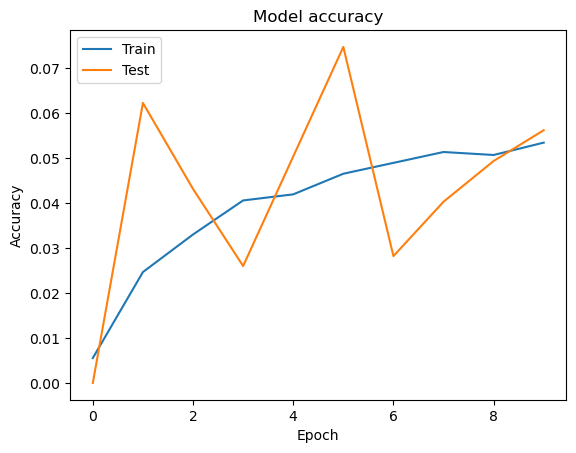

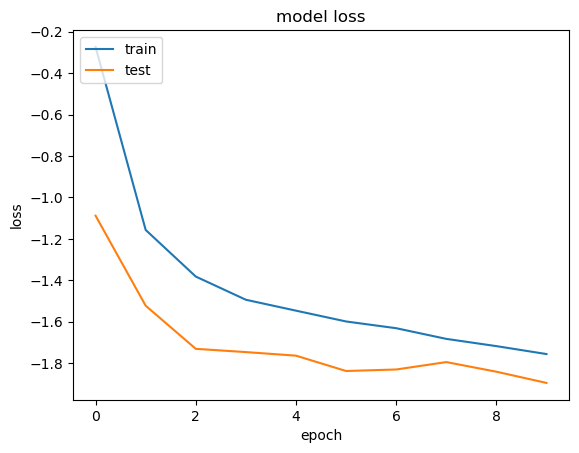

In [73]:
with open(model_path + '_history.csv', mode='rb') as f:
    history_model = pd.read_csv(f)

plt.plot(history_model.accuracy)
plt.plot(history_model.val_accuracy)

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_model.loss)
plt.plot(history_model.val_loss)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [3]:
def to_normal_form(comment):
    comment = comment.split() # Разделяем комментарий на слова
    tokens = []
    for token in comment:
        if token and token not in stopwords:
            token = token.strip() # удаляем лишние пробелы в токене
            token = pymorph.normal_forms(token)[0]
            tokens.append(token)
    return tokens

def clean_comment(comment):
    clean_pattern = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-\n\“\”]+"
    comment = re.sub(clean_pattern, ' ', comment)
    clean_pattern = "[^А-Яа-я\sA-Za-z]"
    comment = re.sub(clean_pattern, ' ', comment)
    return comment

In [5]:
comment = '"408909702014070784";"1386326644";"zunyzipobapi";"А кто-нибудь сможет подсказать хороших книжек по дизайну в вебе )) не себе =)";"1";"0";"0";"0";"285";"100";"77";"0"'
comment = clean_comment(comment)
comment = to_normal_form(comment)
print(comment)

['а', 'смочь', 'подсказать', 'хороший', 'книжка', 'дизайн', 'веб']
